# British_Airways_Task1

# 1 . Web Scraping 

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# URL of the Emirates airline review page
base_url = 'https://www.airlinequality.com/airline-reviews/emirates/page/'

In [3]:
# Create an empty list to store the headings
headings_list = []

In [4]:
# Function to scrape h2 headings with class "text_header" from a single page and add them to the list
def scrape_page(page_url):
    response = requests.get(page_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        headings = soup.find_all('h2', class_='text_header')
        for heading in headings:
            headings_list.append(heading.text.strip())  # Use .strip() to remove leading/trailing white spaces


In [5]:
# Specify the number of pages you want to scrape 
num_pages_to_scrape = 231 

In [10]:
# Loop through the pages and scrape the h2 headings
for page_number in range(1, num_pages_to_scrape + 1):
    page_url = base_url + str(page_number)
    print(f'Scraping page {page_number}...')
    scrape_page(page_url)

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [11]:
# Create a DataFrame from the list of headings
df = pd.DataFrame({'Reviews': headings_list})

In [12]:
# Print the DataFrame
df.head()

,Reviews
0,"""discriminating and alienating your passengers"""
1,"""express my dissatisfaction"""
2,"""choose another airline"""
3,"""You ought to do better"""
4,"""ignored and overlooked"""


In [13]:
df.tail()

,Reviews
3223,Emirates customer review
3224,The Worlds Best Airlines
3225,THE NICEST AIRPORT STAFF
3226,THE CLEANEST AIRLINE
3227,Emirates Photos


In [14]:
df.shape

(3228, 1)

# Data preprocessing

## 1 . Cleaning the data 

In [15]:
# Clean the data by removing unwanted characters and extra whitespaces

 # Remove non-alphanumeric characters
df['Clean_Reviews'] = df['Reviews'].str.replace(r'[^\w\s]', '')  

# Replace multiple spaces with a single space
df['Clean_Reviews'] = df['Reviews'].str.replace(r'\s+', ' ', regex=True) 

 # Strip leading/trailing whitespace
df['Clean_Reviews'] = df['Reviews'].str.strip() 

 # Remove double quotes
df['Clean_Reviews'] = df['Reviews'].str.replace('"', '') 


C:\Users\ssart\AppData\Local\Temp\ipykernel_18548\4182928800.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Clean_Reviews'] = df['Reviews'].str.replace(r'[^\w\s]', '')


In [16]:
df.head()

,Reviews,Clean_Reviews
0,"""discriminating and alienating your passengers""",discriminating and alienating your passengers
1,"""express my dissatisfaction""",express my dissatisfaction
2,"""choose another airline""",choose another airline
3,"""You ought to do better""",You ought to do better
4,"""ignored and overlooked""",ignored and overlooked


# 2. Tokenization

In [17]:
import nltk
from nltk.tokenize import word_tokenize

In [18]:
# Tokenize the cleaned headings and store them in a new column
df['Tokens'] = df['Clean_Reviews'].apply(word_tokenize)

In [15]:
df.head()

,Reviews,Clean_Reviews,Tokens
0,"""discriminating and alienating your passengers""",discriminating and alienating your passengers,"[discriminating, and, alienating, your, passen..."
1,"""express my dissatisfaction""",express my dissatisfaction,"[express, my, dissatisfaction]"
2,"""choose another airline""",choose another airline,"[choose, another, airline]"
3,"""You ought to do better""",You ought to do better,"[You, ought, to, do, better]"
4,"""ignored and overlooked""",ignored and overlooked,"[ignored, and, overlooked]"


# 3. Stop Words

In [22]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssart\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# Define and remove stopwords
stop_words = set(stopwords.words('english'))
df['Stop_word'] = df['Tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

In [31]:
df.head()

,Reviews,Clean_Reviews,Tokens,Stop_word
0,"""discriminating and alienating your passengers""",discriminating and alienating your passengers,"[discriminating, and, alienating, your, passen...","[discriminating, alienating, passengers]"
1,"""express my dissatisfaction""",express my dissatisfaction,"[express, my, dissatisfaction]","[express, dissatisfaction]"
2,"""choose another airline""",choose another airline,"[choose, another, airline]","[choose, another, airline]"
3,"""You ought to do better""",You ought to do better,"[You, ought, to, do, better]","[ought, better]"
4,"""ignored and overlooked""",ignored and overlooked,"[ignored, and, overlooked]","[ignored, overlooked]"


In [29]:
# df.drop(columns=['Cleaned_Tokens','Stemmed_Tokens','Stop_word'], inplace = True)

# 4. Stemming 

In [23]:
from nltk.stem import PorterStemmer

In [35]:
# Apply stemming to the cleaned tokens
stemmer = PorterStemmer()
df['Stemmed_Tokens'] = df['Tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

In [36]:
df.head()

,Reviews,Clean_Reviews,Tokens,Stop_word,Stemmed_Tokens
0,"""discriminating and alienating your passengers""",discriminating and alienating your passengers,"[discriminating, and, alienating, your, passen...","[discriminating, alienating, passengers]","[discrimin, and, alien, your, passeng]"
1,"""express my dissatisfaction""",express my dissatisfaction,"[express, my, dissatisfaction]","[express, dissatisfaction]","[express, my, dissatisfact]"
2,"""choose another airline""",choose another airline,"[choose, another, airline]","[choose, another, airline]","[choos, anoth, airlin]"
3,"""You ought to do better""",You ought to do better,"[You, ought, to, do, better]","[ought, better]","[you, ought, to, do, better]"
4,"""ignored and overlooked""",ignored and overlooked,"[ignored, and, overlooked]","[ignored, overlooked]","[ignor, and, overlook]"


In [38]:
from nltk.stem import WordNetLemmatizer

In [59]:
df.drop(columns=['Lemmatized_Tokens'], inplace = True)

# 4. Lemmatization 

In [61]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [75]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    """
    Map POS tag to the format recognized by WordNet's lemmatizer.
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if the tag is not recognized

# Replace the 'NN' with the appropriate POS tag
df['POS_Tags'] = df['POS_Tags'].apply(lambda pos_tags: [(word, get_wordnet_pos(tag)) for word, tag in pos_tags])

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the tokens using the updated POS tags
df['Lemmatized_Tokens'] = df['POS_Tags'].apply(lambda pos_tags: [lemmatizer.lemmatize(word, pos) for word, pos in pos_tags])


In [41]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ssart\AppData\Roaming\nltk_data...


True

In [77]:
# Combine the lemmatized tokens into a single string without brackets
df['Lemmatized_Tokens'] = df['Lemmatized_Tokens'].apply(lambda tokens: ' '.join(tokens))

In [78]:
df.head()

,Reviews,Clean_Reviews,Tokens,Stop_word,Stemmed_Tokens,POS_Tags,Lemmatized_Tokens
0,"""discriminating and alienating your passengers""",discriminating and alienating your passengers,"[discriminating, and, alienating, your, passen...","[discriminating, alienating, passengers]","[discrimin, and, alien, your, passeng]","[(discriminating, n), (and, n), (alienating, n...",discriminating and alienating your passenger
1,"""express my dissatisfaction""",express my dissatisfaction,"[express, my, dissatisfaction]","[express, dissatisfaction]","[express, my, dissatisfact]","[(express, n), (my, n), (dissatisfaction, n)]",express my dissatisfaction
2,"""choose another airline""",choose another airline,"[choose, another, airline]","[choose, another, airline]","[choos, anoth, airlin]","[(choose, n), (another, n), (airline, n)]",choose another airline
3,"""You ought to do better""",You ought to do better,"[You, ought, to, do, better]","[ought, better]","[you, ought, to, do, better]","[(You, n), (ought, n), (to, n), (do, n), (bett...",You ought to do better
4,"""ignored and overlooked""",ignored and overlooked,"[ignored, and, overlooked]","[ignored, overlooked]","[ignor, and, overlook]","[(ignored, n), (and, n), (overlooked, n)]",ignored and overlooked


# 5. POS tagging 

In [44]:
# POS tagging on the 'Lemmatized_Tokens' column
df['POS_Tags'] = df['Lemmatized_Tokens'].apply(nltk.pos_tag)

In [79]:
df.head()

,Reviews,Clean_Reviews,Tokens,Stop_word,Stemmed_Tokens,POS_Tags,Lemmatized_Tokens
0,"""discriminating and alienating your passengers""",discriminating and alienating your passengers,"[discriminating, and, alienating, your, passen...","[discriminating, alienating, passengers]","[discrimin, and, alien, your, passeng]","[(discriminating, n), (and, n), (alienating, n...",discriminating and alienating your passenger
1,"""express my dissatisfaction""",express my dissatisfaction,"[express, my, dissatisfaction]","[express, dissatisfaction]","[express, my, dissatisfact]","[(express, n), (my, n), (dissatisfaction, n)]",express my dissatisfaction
2,"""choose another airline""",choose another airline,"[choose, another, airline]","[choose, another, airline]","[choos, anoth, airlin]","[(choose, n), (another, n), (airline, n)]",choose another airline
3,"""You ought to do better""",You ought to do better,"[You, ought, to, do, better]","[ought, better]","[you, ought, to, do, better]","[(You, n), (ought, n), (to, n), (do, n), (bett...",You ought to do better
4,"""ignored and overlooked""",ignored and overlooked,"[ignored, and, overlooked]","[ignored, overlooked]","[ignor, and, overlook]","[(ignored, n), (and, n), (overlooked, n)]",ignored and overlooked


In [74]:
df[['Reviews','Lemmatized_Tokens']]

,Reviews,Lemmatized_Tokens
0,"""discriminating and alienating your passengers""",discriminating and alienate your passenger
1,"""express my dissatisfaction""",express my dissatisfaction
2,"""choose another airline""",choose another airline
3,"""You ought to do better""",You ought to do good
4,"""ignored and overlooked""",ignore and overlook
...,...,...
3223,Emirates customer review,Emirates customer review
3224,The Worlds Best Airlines,The Worlds Best Airlines
3225,THE NICEST AIRPORT STAFF,THE NICEST AIRPORT STAFF
3226,THE CLEANEST AIRLINE,THE CLEANEST AIRLINE


# Sentiment Analysis 

In [80]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [81]:
# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

In [82]:
# Calculate sentiment scores for each review
df['Sentiment_Score'] = df['Lemmatized_Tokens'].apply(lambda review: sia.polarity_scores(review)['compound'])

In [83]:
# Classify sentiment as positive, neutral, or negative
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [84]:
df['Sentiment'] = df['Sentiment_Score'].apply(classify_sentiment)

In [85]:
df.head()

,Reviews,Clean_Reviews,Tokens,Stop_word,Stemmed_Tokens,POS_Tags,Lemmatized_Tokens,Sentiment_Score,Sentiment
0,"""discriminating and alienating your passengers""",discriminating and alienating your passengers,"[discriminating, and, alienating, your, passen...","[discriminating, alienating, passengers]","[discrimin, and, alien, your, passeng]","[(discriminating, n), (and, n), (alienating, n...",discriminating and alienating your passenger,0.0000,Neutral
1,"""express my dissatisfaction""",express my dissatisfaction,"[express, my, dissatisfaction]","[express, dissatisfaction]","[express, my, dissatisfact]","[(express, n), (my, n), (dissatisfaction, n)]",express my dissatisfaction,-0.4939,Negative
2,"""choose another airline""",choose another airline,"[choose, another, airline]","[choose, another, airline]","[choos, anoth, airlin]","[(choose, n), (another, n), (airline, n)]",choose another airline,0.0000,Neutral
3,"""You ought to do better""",You ought to do better,"[You, ought, to, do, better]","[ought, better]","[you, ought, to, do, better]","[(You, n), (ought, n), (to, n), (do, n), (bett...",You ought to do better,0.4404,Positive
4,"""ignored and overlooked""",ignored and overlooked,"[ignored, and, overlooked]","[ignored, overlooked]","[ignor, and, overlook]","[(ignored, n), (and, n), (overlooked, n)]",ignored and overlooked,-0.3400,Negative


In [91]:
Sentiment = df['Sentiment'].value_counts()
Sentiment

Neutral     1672
Positive    1011
Negative     545
Name: Sentiment, dtype: int64

# Create a pie chart Of Sentiment 

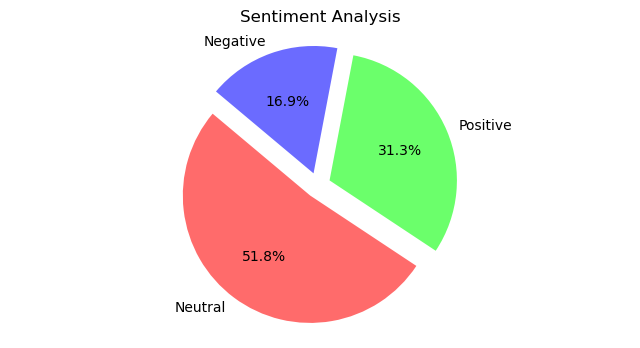

In [99]:
import matplotlib.pyplot as plt

# Sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

# Define custom colors
colors = ['#FF6B6B', '#6BFF6B', '#6B6BFF'] 

# Define how much to explode each segment
explode = (0.1, 0.1, 0.1)

# Create a pie chart
plt.figure(figsize=(8, 4))

# Create the cut pie chart with custom colors and explosion
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

# Add a title
plt.title('Sentiment Analysis')

# Show the chart
plt.axis('equal')  

plt.show()


# WordCloud

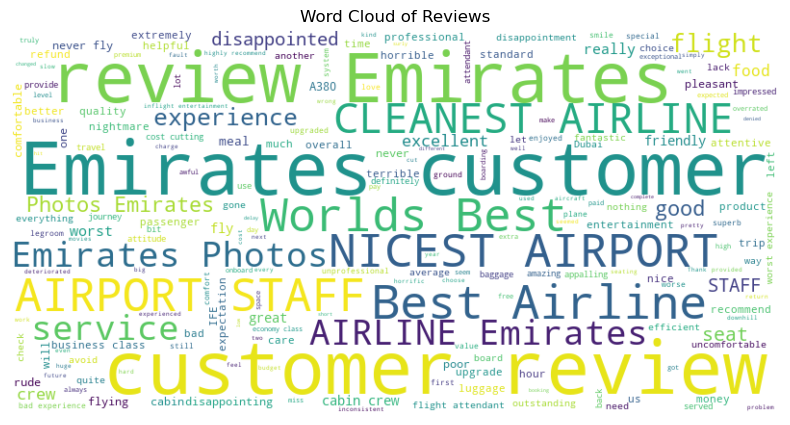

In [100]:
from wordcloud import WordCloud

# Combine all reviews into a single string
all_reviews = ' '.join(df['Clean_Reviews'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()
